In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import os
import voyageai
import pandas as pd
import os
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import bokeh
import os
import backoff
import numpy as np
from sklearn.cluster import KMeans
import backoff
import requests 

In [2]:
# Load embeddings file

# input the path to your saved embeddings
path = '/Users/ellenbowen/Desktop/Michigan/Siwo_lab/'
file = str(path) + 'phecode_voyage_embedding.pkl'

embeddings_df = pd.read_pickle(file)

In [3]:
embeddings_df

,phecode,phenotype,phecode_exclude_range,sex,rollup,leaf,category_number,category,embeddings
0,8.00,Intestinal infection,001-009.99,NaN,1,0,1,infectious diseases,"[-0.0158908162266016, 0.035250891000032425, 0...."
1,8.50,Bacterial enteritis,001-009.99,Both,1,0,1,infectious diseases,"[-0.0012496799463406205, 0.03793037682771683, ..."
2,8.51,Intestinal e.coli,001-009.99,Both,1,1,1,infectious diseases,"[-0.010055524297058582, 0.047426193952560425, ..."
3,8.52,Intestinal infection due to C. difficile,001-009.99,Both,1,1,1,infectious diseases,"[-0.02957858145236969, 0.04090549424290657, 0...."
4,8.60,Viral Enteritis,001-009.99,Both,1,1,1,infectious diseases,"[-0.005069051403552294, 0.03614606708288193, 0..."
...,...,...,...,...,...,...,...,...,...
1861,994.00,Sepsis and SIRS,994-994.99,NaN,1,0,18,injuries & poisonings,"[-0.015241697430610657, 0.029900213703513145, ..."
1862,994.10,Systemic inflammatory response syndrome (SIRS),994-994.99,Both,1,1,18,injuries & poisonings,"[-0.025385240092873573, 0.03399652987718582, 0..."
1863,994.20,Sepsis,994-994.99,Both,1,0,18,injuries & poisonings,"[-0.019122302532196045, 0.027068229392170906, ..."
1864,994.21,Septic shock,994-994.99,Both,1,1,18,injuries & poisonings,"[-0.03575393557548523, 0.03473980724811554, 0...."


In [4]:
vo = voyageai.Client()

def embed_phenotype(phenotype):
    # Get the embedding for the phenotype using Voyage AI
    result = vo.embed(texts=[phenotype], model="voyage-2", input_type="document")
    # Extract embeddings from the EmbeddingsObject
    embedding = result.embeddings[0]
    return embedding


In [6]:
mendelian_dx = ['Nocturnal frontal lobe epilepsy 1',
'Nephrotic syndrome type 7',
'Sulfocysteinuria',
'Charcotte Marie Tooth Disease 2A',
'Spastic Paraplegia 30',
'Factor X deficiency',
'Hemochromatosis',
'Thyroid dyshormonogenesis',
'Familial erythrocytosis 1',
'Spinocerebellar ataxia',
'Interstitial nephritis karyomegalic',
'HARP syndrome',
'Essential thrombocythemia',
'Primary hyperoxaluria type 1',
'Familial cold autoinflammatory syndrome 3',
'Fabrys Disease',
'Batten disease',
'Splice switching antisense oligonucleotides targeting CLN3']

# Create a DataFrame
mendelian_dx_df = pd.DataFrame(mendelian_dx, columns=['disease'])



In [7]:
mendelian_dx_df

,disease
0,Nocturnal frontal lobe epilepsy 1
1,Nephrotic syndrome type 7
2,Sulfocysteinuria
3,Charcotte Marie Tooth Disease 2A
4,Spastic Paraplegia 30
5,Factor X deficiency
6,Hemochromatosis
7,Thyroid dyshormonogenesis
8,Familial erythrocytosis 1
9,Spinocerebellar ataxia


In [10]:
# Apply the get_embedding function to each row and create a new column for embeddings
mendelian_dx_df['embeddings'] = mendelian_dx_df['disease'].apply(embed_phenotype)


In [11]:
# Save the DataFrame to a .pkl file
mendelian_dx_df.to_pickle('mendelian_diseases_voyage_embeddings.pkl')

In [12]:
import pandas as pd

# Rename the first column in mendelian_dx_df
mendelian_dx_df.rename(columns={"disease": "phenotype"}, inplace=True)

# Concatenate mendelian_dx_df to embeddings_df
combined_df = pd.concat([embeddings_df, mendelian_dx_df], ignore_index=True)



In [13]:
combined_df

,phecode,phenotype,phecode_exclude_range,sex,rollup,leaf,category_number,category,embeddings
0,8.00,Intestinal infection,001-009.99,NaN,1.0,0.0,1.0,infectious diseases,"[-0.0158908162266016, 0.035250891000032425, 0...."
1,8.50,Bacterial enteritis,001-009.99,Both,1.0,0.0,1.0,infectious diseases,"[-0.0012496799463406205, 0.03793037682771683, ..."
2,8.51,Intestinal e.coli,001-009.99,Both,1.0,1.0,1.0,infectious diseases,"[-0.010055524297058582, 0.047426193952560425, ..."
3,8.52,Intestinal infection due to C. difficile,001-009.99,Both,1.0,1.0,1.0,infectious diseases,"[-0.02957858145236969, 0.04090549424290657, 0...."
4,8.60,Viral Enteritis,001-009.99,Both,1.0,1.0,1.0,infectious diseases,"[-0.005069051403552294, 0.03614606708288193, 0..."
...,...,...,...,...,...,...,...,...,...
1879,NaN,Primary hyperoxaluria type 1,NaN,NaN,NaN,NaN,NaN,NaN,"[-0.0009210984571836889, 0.025785721838474274,..."
1880,NaN,Familial cold autoinflammatory syndrome 3,NaN,NaN,NaN,NaN,NaN,NaN,"[-0.010404447093605995, 0.025906318798661232, ..."
1881,NaN,Fabrys Disease,NaN,NaN,NaN,NaN,NaN,NaN,"[-0.009978135116398335, 0.031293027102947235, ..."
1882,NaN,Batten disease,NaN,NaN,NaN,NaN,NaN,NaN,"[-0.006407235749065876, 0.040976203978061676, ..."


In [14]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Ensure embeddings are in the correct format
def parse_embedding(embedding):
    if isinstance(embedding, str):
        return np.array(eval(embedding))
    return np.array(embedding)

combined_df['embeddings'] = combined_df['embeddings'].apply(parse_embedding)
embeddings = np.vstack(combined_df['embeddings'].values)

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(embeddings)

# Create a DataFrame for the similarity matrix with phenotype labels
similarity_df = pd.DataFrame(cosine_sim_matrix, index=combined_df['phenotype'], columns=combined_df['phenotype'])






In [15]:
similarity_df

phenotype,Intestinal infection,Bacterial enteritis,Intestinal e.coli,Intestinal infection due to C. difficile,Viral Enteritis,Intestinal infection due to protozoa,Tuberculosis,Diseases due to other mycobacteria,Leprosy,Septicemia,...,Familial erythrocytosis 1,Spinocerebellar ataxia,Interstitial nephritis karyomegalic,HARP syndrome,Essential thrombocythemia,Primary hyperoxaluria type 1,Familial cold autoinflammatory syndrome 3,Fabrys Disease,Batten disease,Splice switching antisense oligonucleotides targeting CLN3
phenotype,,,,,,,,,,,,,,,,,,,,,
Intestinal infection,1.000000,0.962288,0.969029,0.968908,0.963056,0.974034,0.909554,0.907474,0.909978,0.923329,...,0.888593,0.870277,0.908549,0.889666,0.870682,0.885030,0.888255,0.901974,0.914157,0.824551
Bacterial enteritis,0.962288,1.000000,0.951698,0.945704,0.983047,0.948859,0.914034,0.921766,0.907947,0.927417,...,0.898555,0.877985,0.912864,0.893755,0.873024,0.892473,0.899912,0.908545,0.921590,0.827435
Intestinal e.coli,0.969029,0.951698,1.000000,0.948993,0.945185,0.950339,0.896673,0.894894,0.893243,0.913342,...,0.883735,0.858898,0.889914,0.869650,0.864346,0.871694,0.872510,0.883565,0.894411,0.826331
Intestinal infection due to C. difficile,0.968908,0.945704,0.948993,1.000000,0.941412,0.954089,0.887060,0.898548,0.885229,0.904156,...,0.878709,0.856540,0.894188,0.875323,0.855835,0.868744,0.877040,0.891939,0.898877,0.815364
Viral Enteritis,0.963056,0.983047,0.945185,0.941412,1.000000,0.940598,0.922705,0.906386,0.919581,0.925476,...,0.904371,0.882553,0.913578,0.902306,0.874367,0.890364,0.910157,0.912054,0.921301,0.836359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Primary hyperoxaluria type 1,0.885030,0.892473,0.871694,0.868744,0.890364,0.869074,0.873903,0.862199,0.876054,0.901539,...,0.899545,0.871527,0.895827,0.884059,0.876606,1.000000,0.871848,0.879041,0.882473,0.820248
Familial cold autoinflammatory syndrome 3,0.888255,0.899912,0.872510,0.877040,0.910157,0.868456,0.892192,0.880851,0.884544,0.883687,...,0.921362,0.873478,0.891934,0.886141,0.867069,0.871848,1.000000,0.911404,0.898175,0.851978
Fabrys Disease,0.901974,0.908545,0.883565,0.891939,0.912054,0.880630,0.911641,0.903058,0.902682,0.895081,...,0.914839,0.879685,0.890171,0.892389,0.871409,0.879041,0.911404,1.000000,0.926827,0.818382


In [16]:
# Save the similarity matrix to a CSV file
similarity_df.to_csv('similarity_matrix_with_mendelian_diseases_phecodes_voyage_embeddings.csv')


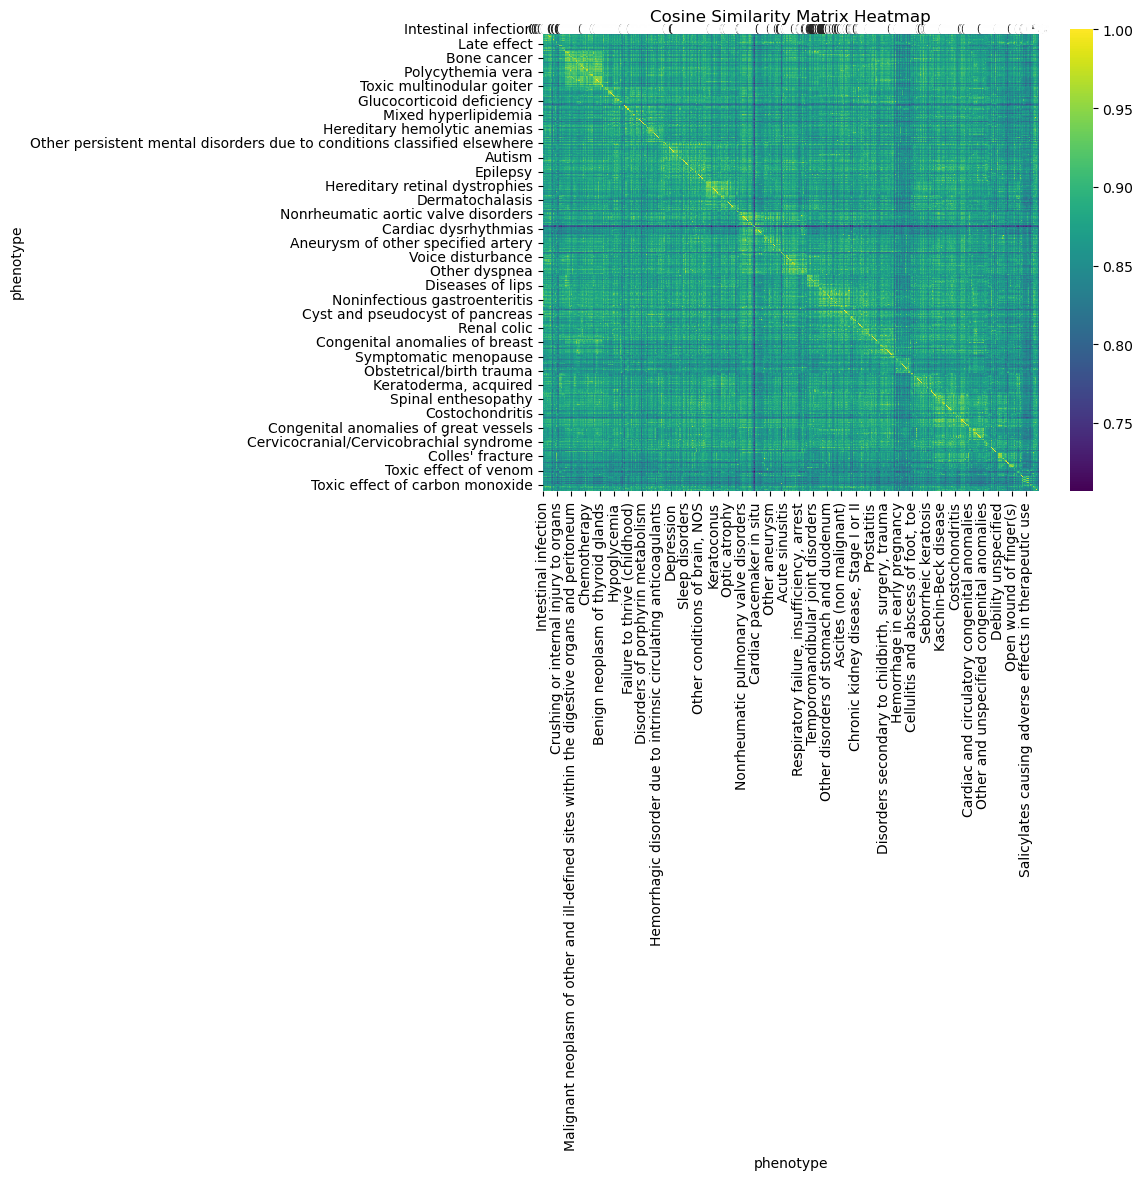

In [17]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(similarity_df, annot=True, cmap='viridis')
plt.title('Cosine Similarity Matrix Heatmap')
plt.show()

In [18]:

# def find_similar_phenotypes(df, query, top_n=5):
#     row = df.loc[query]

#     # Sort the values in descending order
#     sorted_row = row.sort_values(ascending=False)

#     # Select the top n values
#     top_values = sorted_row.head(top_n)
#     return top_values

# # Example usage
# query_phenotype = "Intestinal infection"
# top_n = 5
# similar_phenotypes = find_similar_phenotypes(similarity_df, query_phenotype, top_n)
# print(similar_phenotypes)

In [19]:
import pandas as pd
import difflib

def find_similar_phenotypes(df, query, top_n=5):
    
    print("Search term: " + str(query))
    # Normalize the query to lowercase
    query = query.lower()
    
    # Normalize the dataframe index to lowercase
    normalized_index = df.index.str.lower()
    
    # Find the closest match for the query
    closest_match = difflib.get_close_matches(query, normalized_index, n=1, cutoff=0.6)
    print("Showing results for : " + str(closest_match))
    
    if not closest_match:
        raise ValueError(f"Query phenotype '{query}' not found in the dataframe.")
    
    # Get the actual index of the closest match
    actual_query = df.index[normalized_index == closest_match[0]].tolist()[0]
    
    # Select the row for the query phenotype
    row = df.loc[actual_query]

    # Sort the values in descending order
    sorted_row = row.sort_values(ascending=False)

    # Select the top n values
    top_values = sorted_row.head(top_n)
    
    return top_values

# Example usage
# Assuming similarity_df is your dataframe with similarity scores
query_phenotype = "Fabrys disease"
top_n = 10
similar_phenotypes = find_similar_phenotypes(similarity_df, query_phenotype, top_n)
print(similar_phenotypes)


Search term: Fabrys disease
Showing results for : ['fabrys disease']
phenotype
Fabrys Disease              1.000000
Graves' disease             0.933616
Fuchs' dystrophy            0.933529
Peyronie's disease          0.931939
Takayasu's disease          0.930117
Batten disease              0.926827
Myelofibrosis               0.925752
Reiter's disease            0.924853
Von willebrand's disease    0.924330
Cystic fibrosis             0.923562
Name: Fabrys Disease, dtype: float64
